#Data Exploration and Data Visualization



## **Libraries**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading data**

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods.

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated with a day and a country.

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload.




In [ ]:
X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

## **Data Exploration**

### Merging the Datasets

In order to explore all the dataset, we decided to merge the X_train and Y_train datasets.

In [ ]:
merged_df = pd.merge(X_train, Y_train, on='ID')

### Dataset Overview

Now that we have merged the datasets, we can have a look at the 6 first rows of the merged dataset to have an overview of it.

In [ ]:
merged_df.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733


### Dataset Shape

In [ ]:
merged_df.shape

(1494, 36)

The dataset is composed of 1494 rows and 36 columns (corresponding to the features).

### Dataset Information

Calling the info() function will help us identify the number of non null values and the data type of each feature.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1494 entries, 0 to 1493
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


We cans see that some features have null values, lets identify which one and how many.

### Dataset Null Values

In [ ]:
merged_df.isnull().sum()

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              94
FR_RAIN              94
DE_WIND              94
FR_WIND              94
DE_TEMP              94
FR_TEMP              94
GAS_RET               0
COAL_RET              0
CARBON_RET            0
TARGET                0
dtype: int64

We can observe that some variables have some null values (we can see it thanks to the non-null count which is lower than the total number of rows for some variables). We will deal with the null values in the preprocessing part.



### Dataset Statistics

Statistics are always interesting for continuous variables. Here is a resumee of the statistics of each feature.

In [19]:
merged_df.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510,0.089934
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624,1.034582
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790,-6.519268
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968,-0.219861
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056,0.000000
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094,0.269719
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818,7.786578


## **Data Vizualisation**


Now that we explored the dataset we would like to visualize the variables, and more precisely the Target one and its relation with other features.

### Target Distribution

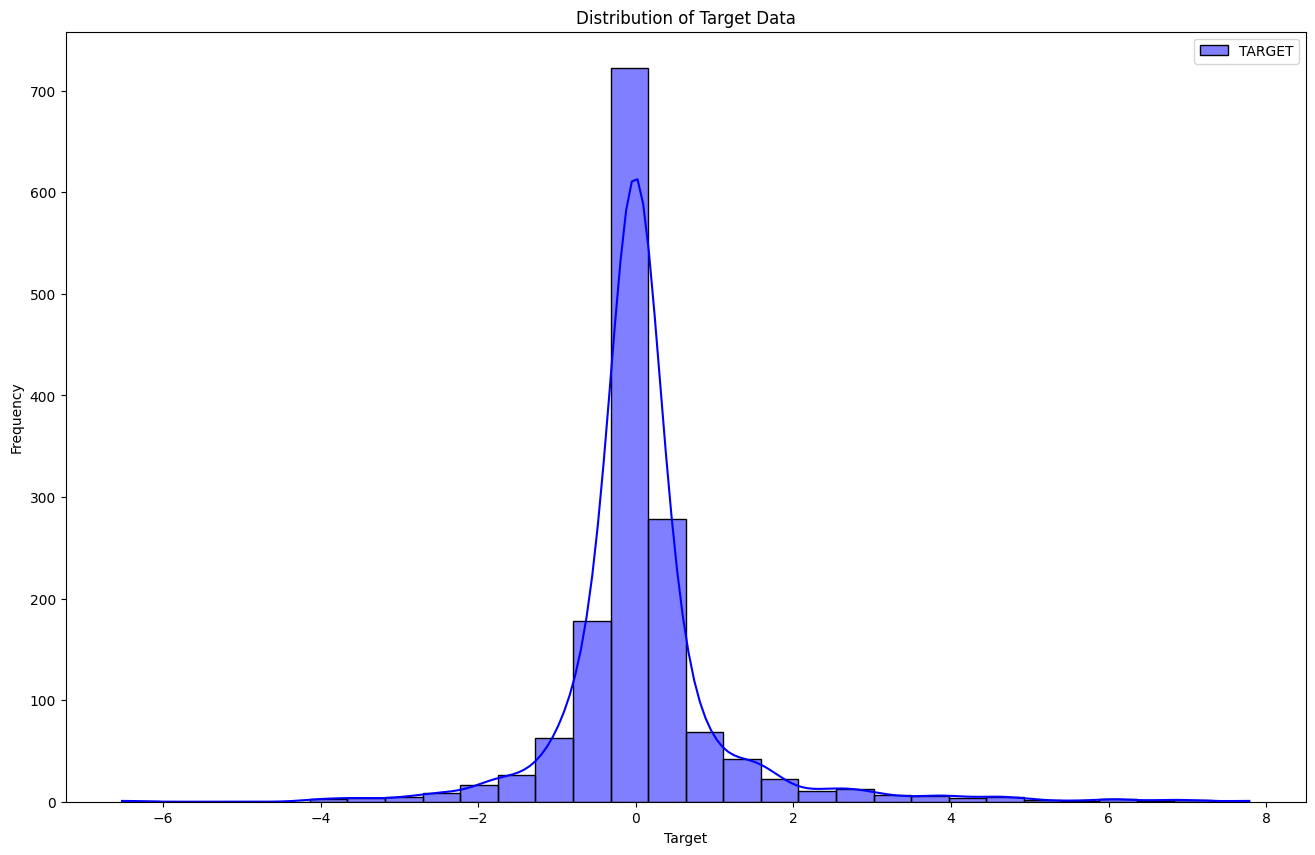

In [32]:
plt.figure(figsize=(16, 10))
sns.histplot(data=merged_df, x='TARGET', bins=30, kde=True, color='blue', label='TARGET')
#sns.histplot(data=merged_df, x='FR_CONSUMPTION', bins=30, kde=True, color='red', label='FR_CONSUMPTION')
# Add more histograms for other numerical variables as needed
plt.title('Distribution of Target Data')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can see that the Target Variable seems to be normally distributed, with the majority of the daily price of electricity being correctly predicted (or closely).

What is the evolution of the target variable over time ?

### Evolution of Target Variable over Time

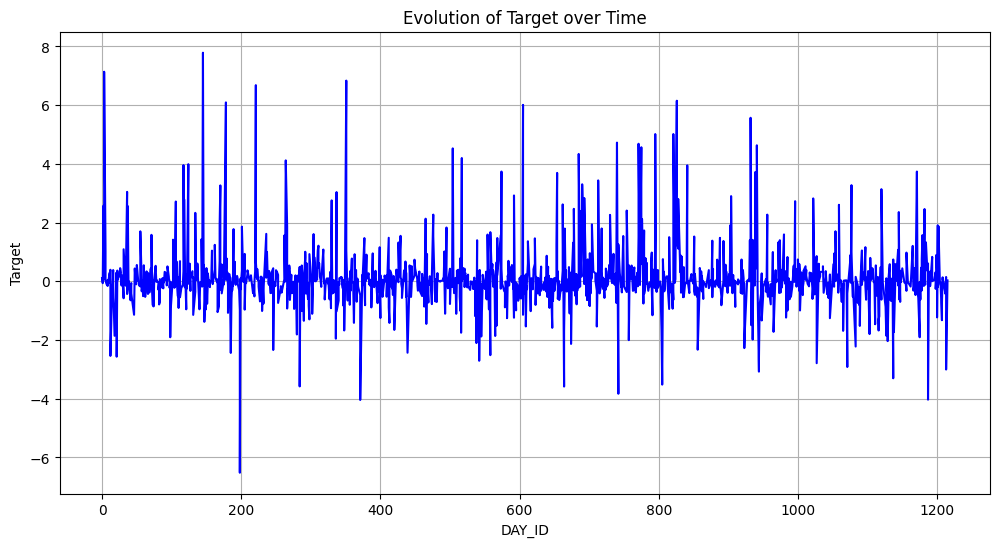

In [22]:
# Sort the data by DAY_ID for plotting
sorted_data = merged_df.sort_values(by='DAY_ID')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['DAY_ID'], sorted_data['TARGET'], color='blue')
plt.title('Evolution of Target over Time')
plt.xlabel('DAY_ID')
plt.ylabel('Target')
plt.grid(True)
plt.show()

We can see that the majority of the variation of price is concentrated around the 0 line within the time, but some outliers are detectable. There is no specific trend or schema also over time.

Is there any similarity between France and Germany electricity price variation over time ?

### Evolution of Target Variable over Time for each country

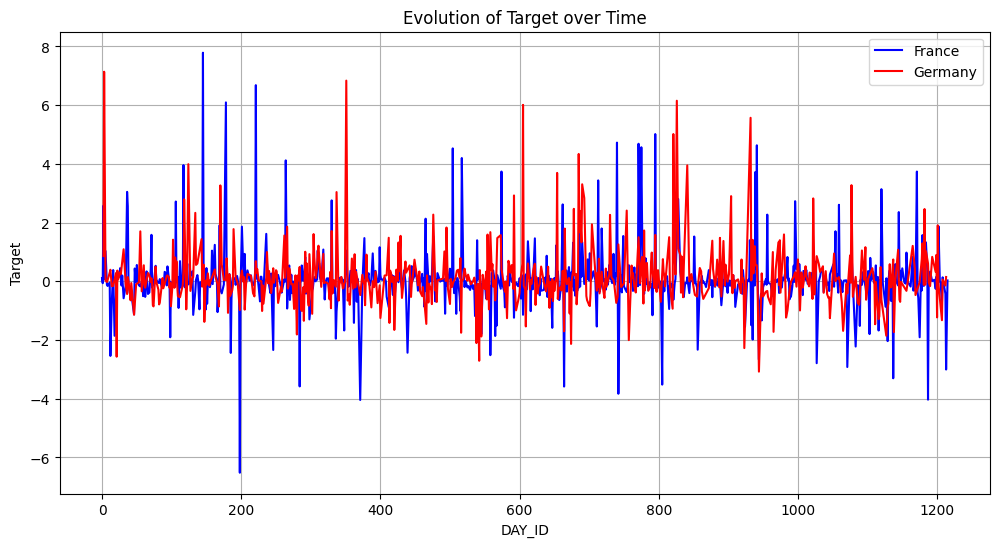

In [23]:
# Sort the data by DAY_ID for plotting
sorted_data = merged_df.sort_values(by='DAY_ID')

# Separate data for France and Germany
france_data = sorted_data[sorted_data['COUNTRY'] == 'FR']
germany_data = sorted_data[sorted_data['COUNTRY'] == 'DE']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(france_data['DAY_ID'], france_data['TARGET'], color='blue', label='France')
plt.plot(germany_data['DAY_ID'], germany_data['TARGET'], color='red', label='Germany')
plt.title('Evolution of Target over Time')
plt.xlabel('DAY_ID')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

Both France and Germany have their own evolution of price variation over time.

It could be interesting to perform different models for each country.

Which Variables influence the Target one ?

### Correlation between Target and all the other Variables

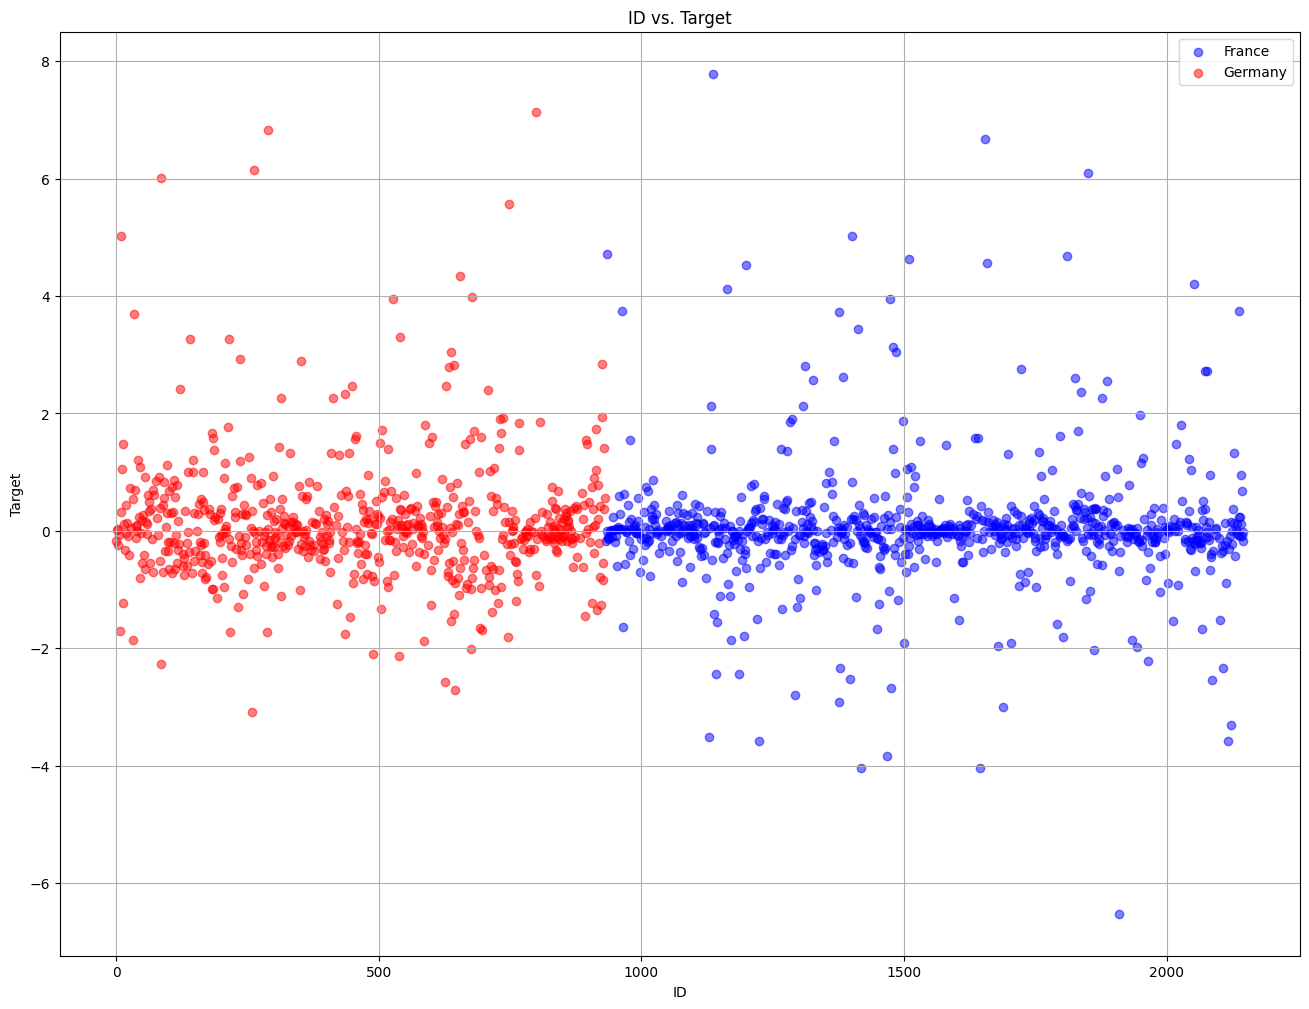

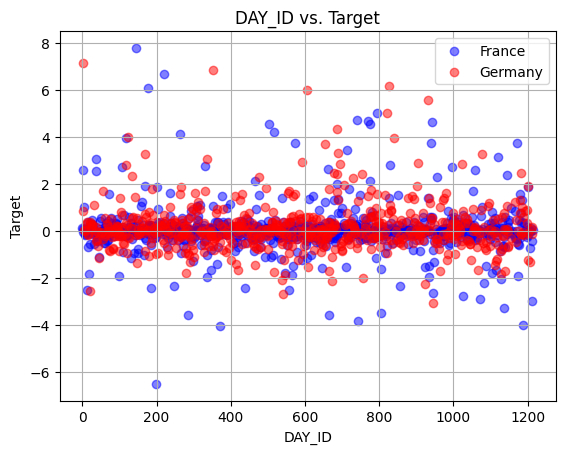

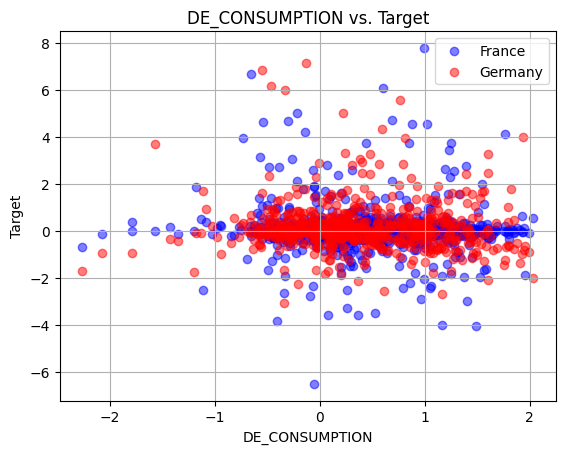

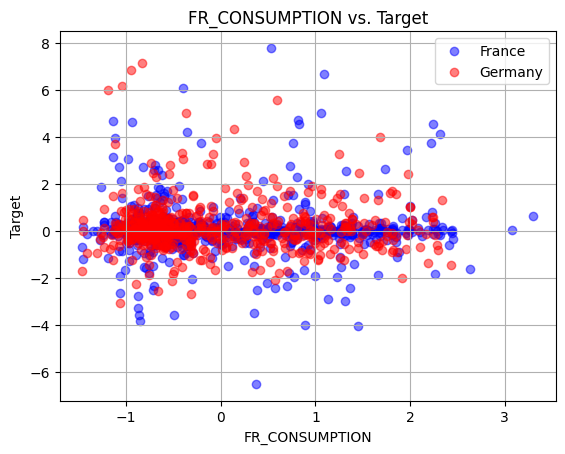

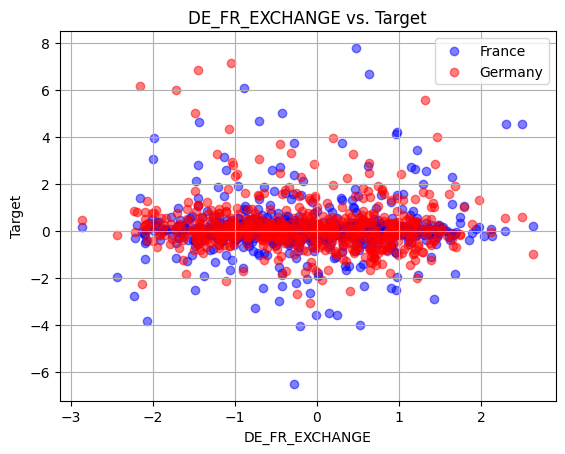

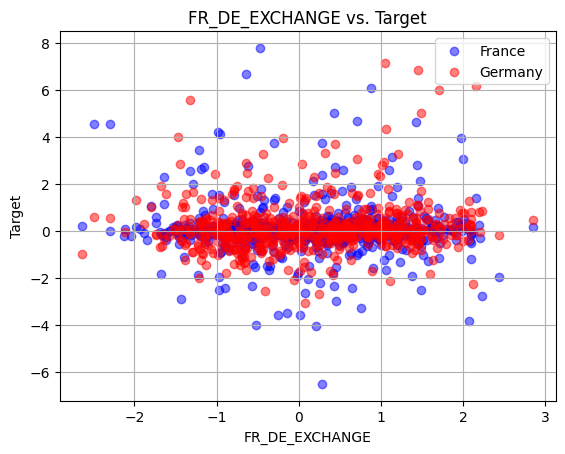

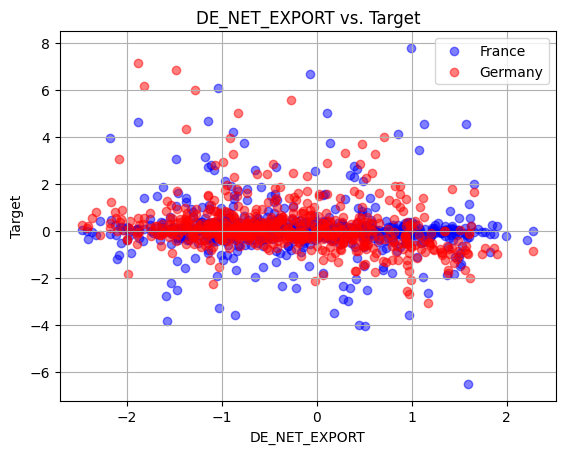

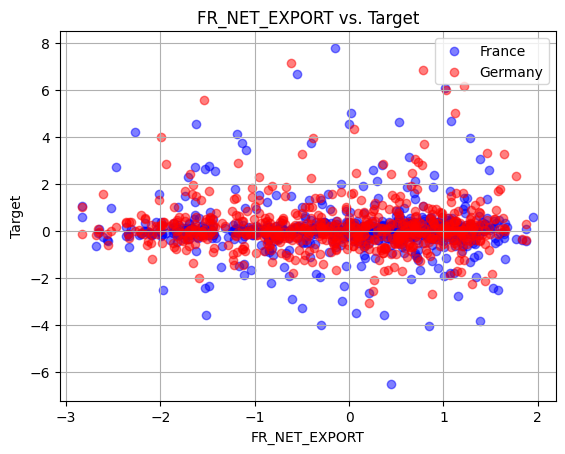

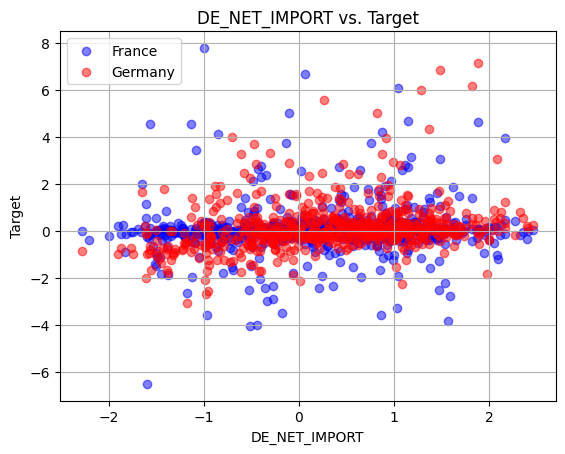

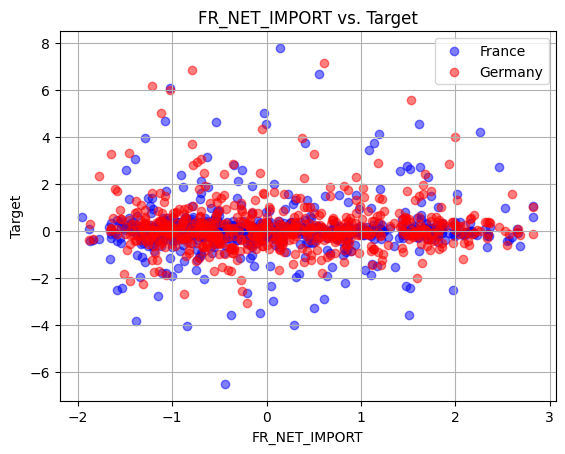

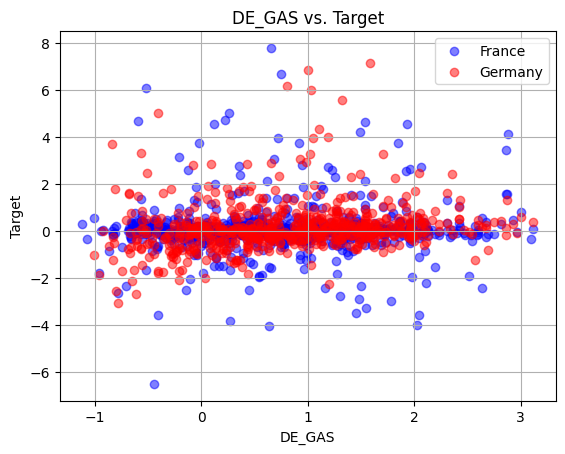

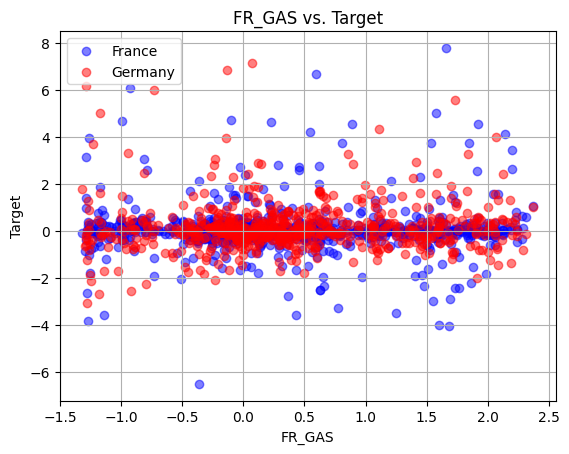

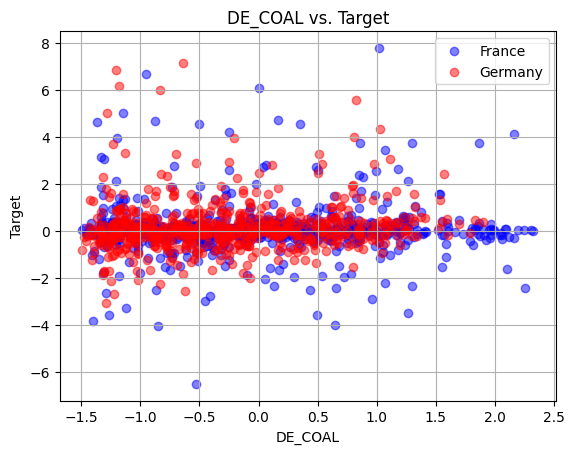

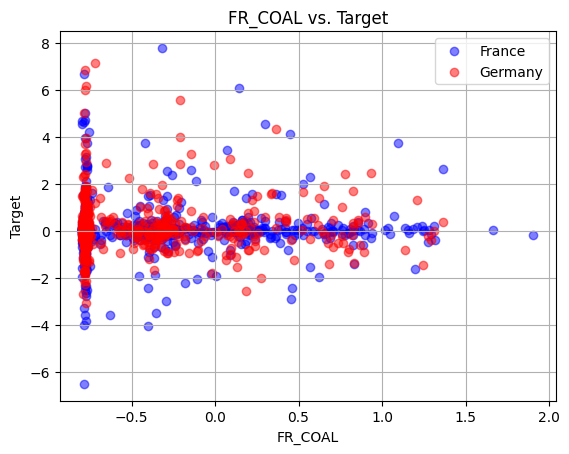

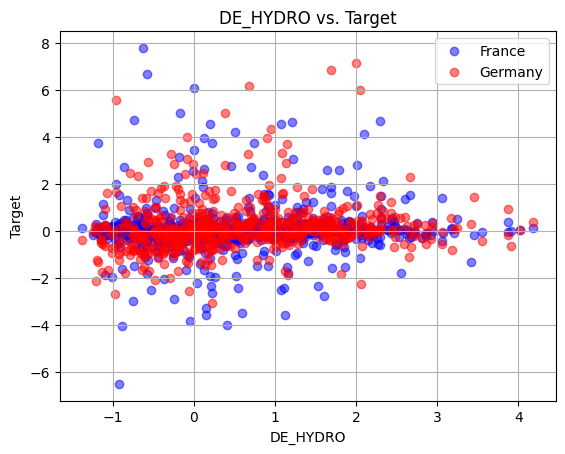

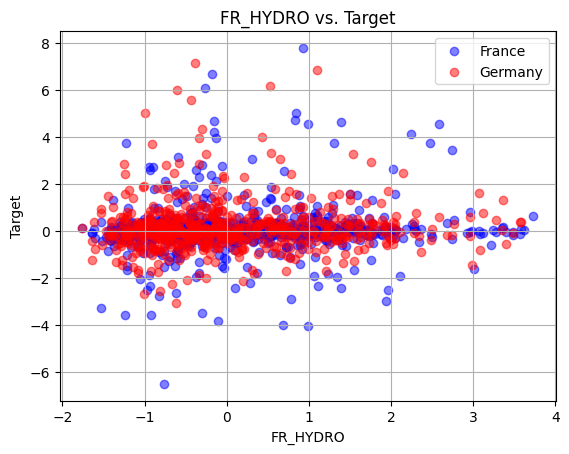

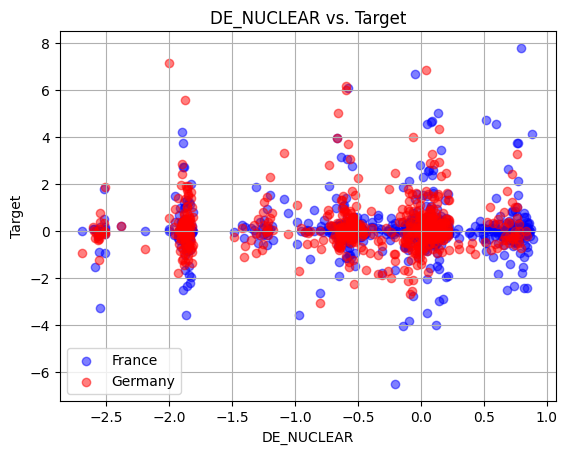

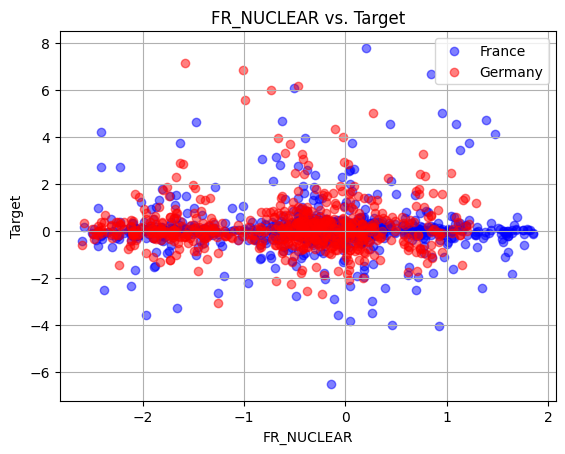

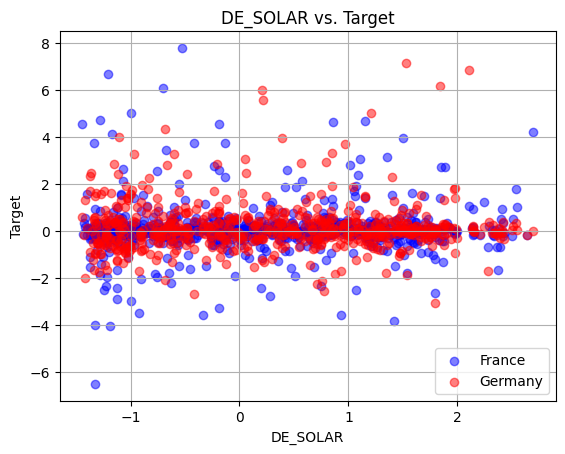

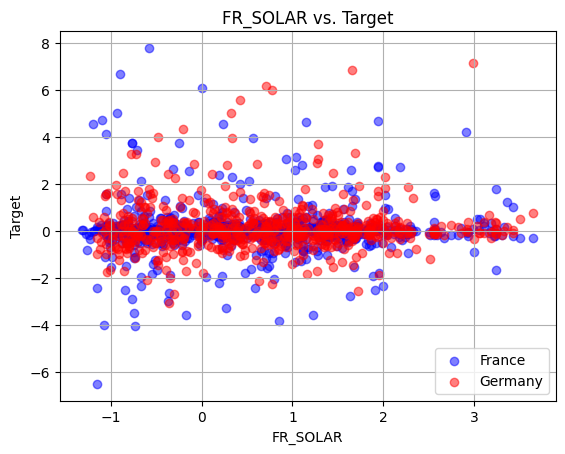

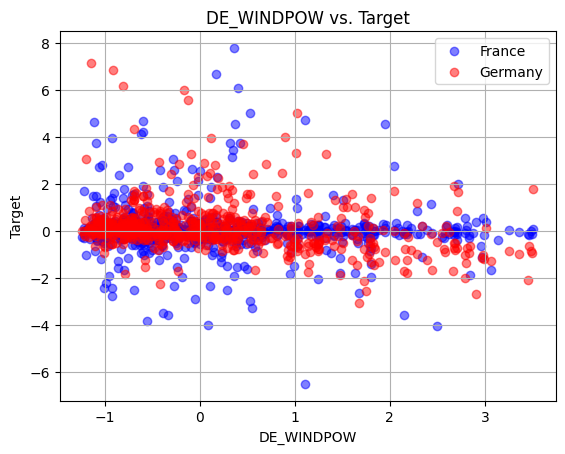

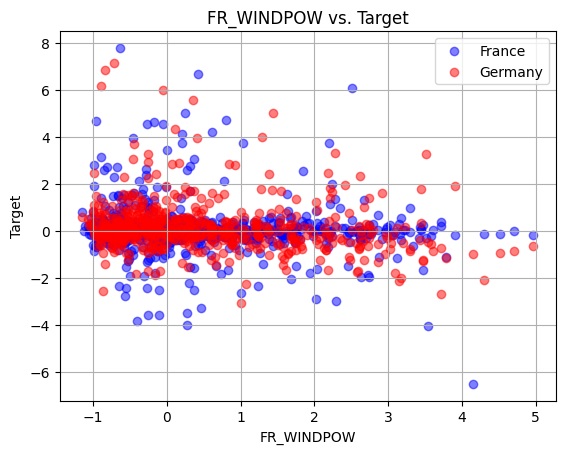

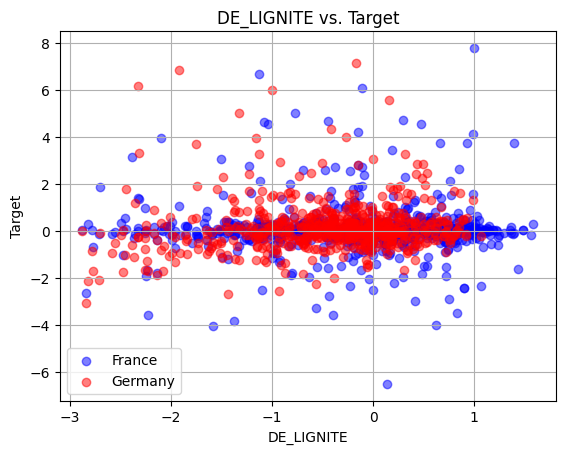

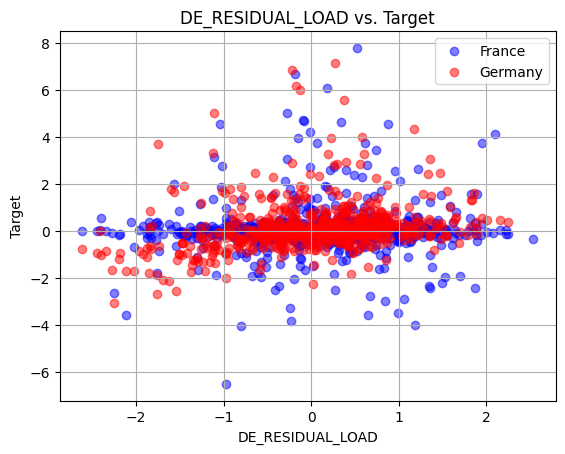

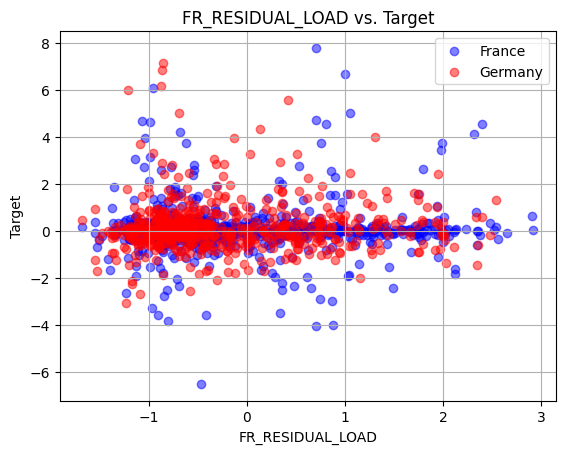

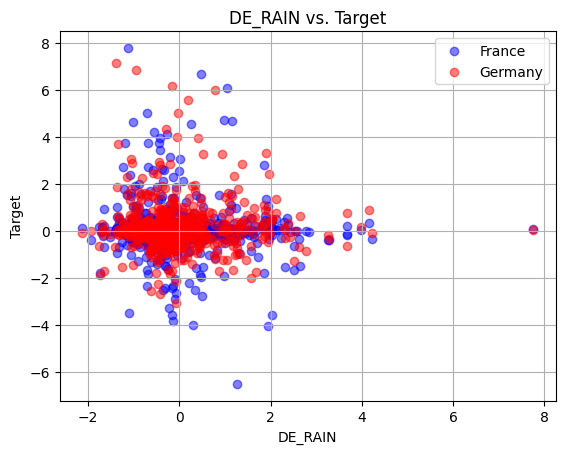

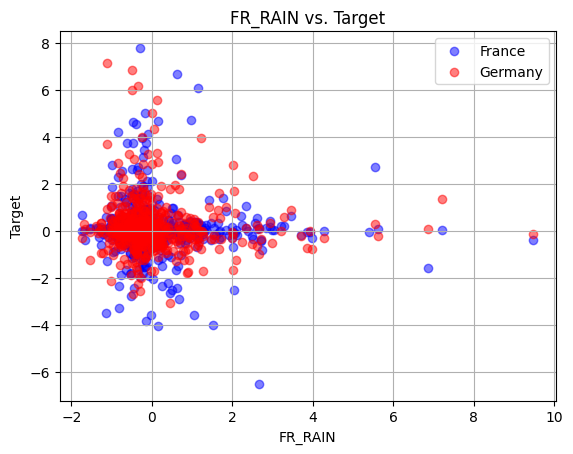

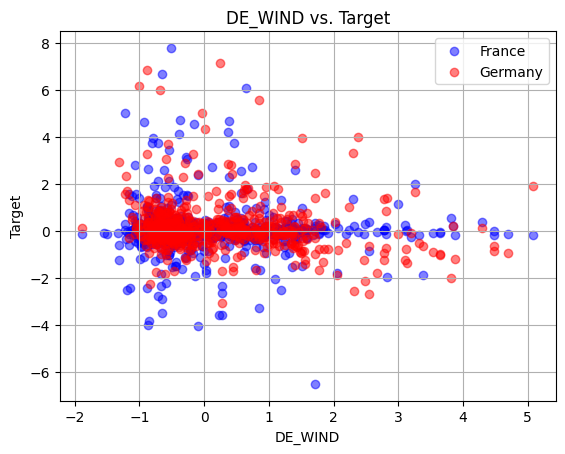

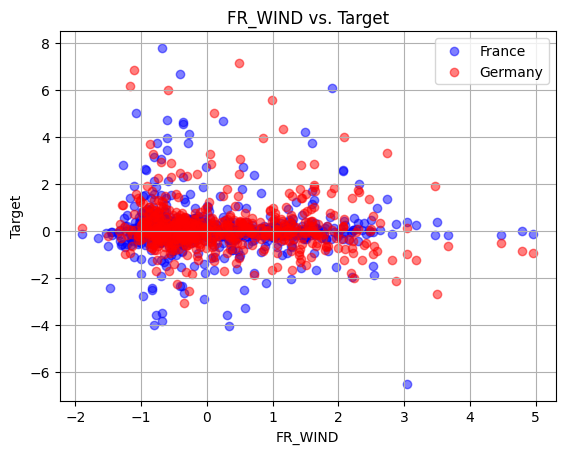

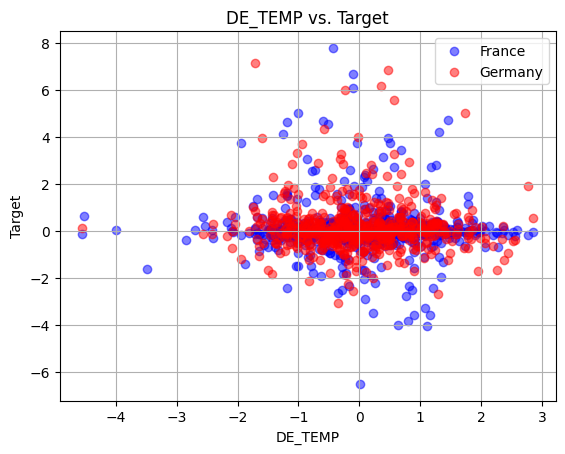

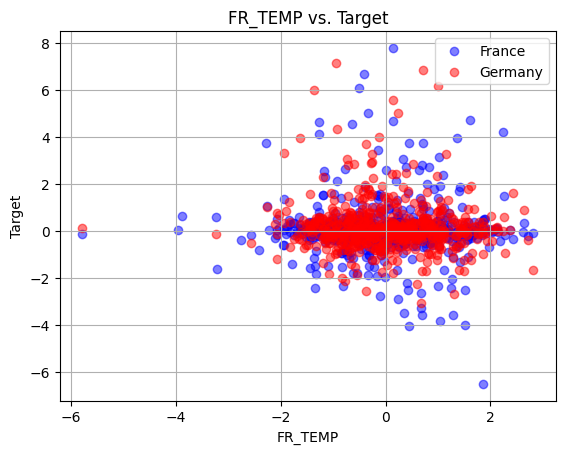

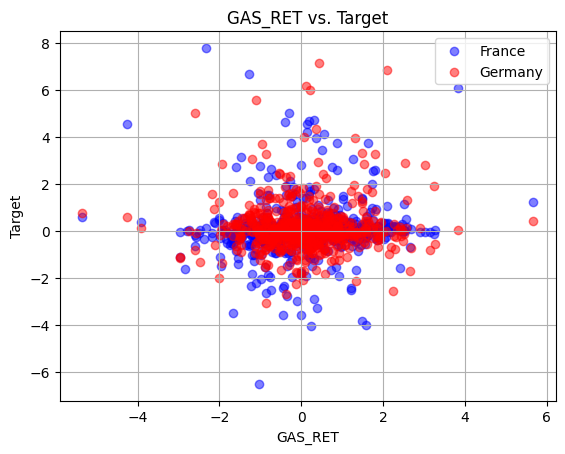

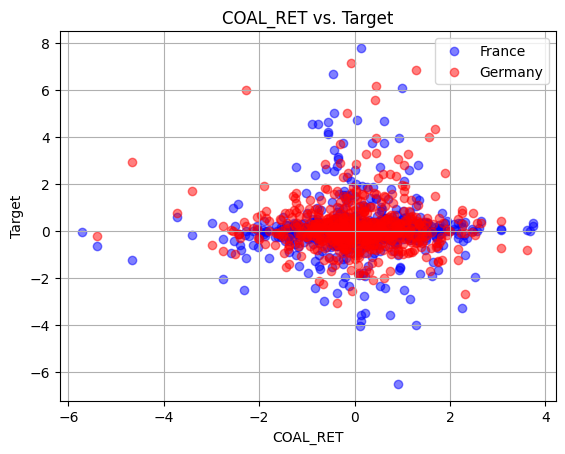

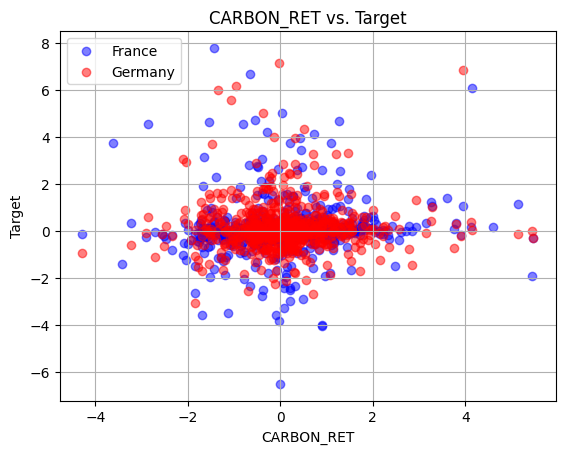

In [31]:
# Plotting
plt.figure(figsize=(16, 12))

# Loop through each column except for 'TARGET'
for column in merged_df.columns:
    if column != 'TARGET' and column != 'COUNTRY':  # Exclude 'TARGET' and 'COUNTRY' columns
        # Scatter plot for the current variable against the target variable for France
        plt.scatter(france_data[column], france_data['TARGET'], color='blue', label='France', alpha=0.5)

        # Scatter plot for the current variable against the target variable for Germany
        plt.scatter(germany_data[column], germany_data['TARGET'], color='red', label='Germany', alpha=0.5)

        plt.title('{} vs. Target'.format(column))
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.legend()
        plt.grid(True)
        plt.show()

These plots will help us when chossing the features importance.

Another usefull tool is the correlation matrix.

### Correlation matrix

<ipython-input-13-a0db08555010>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


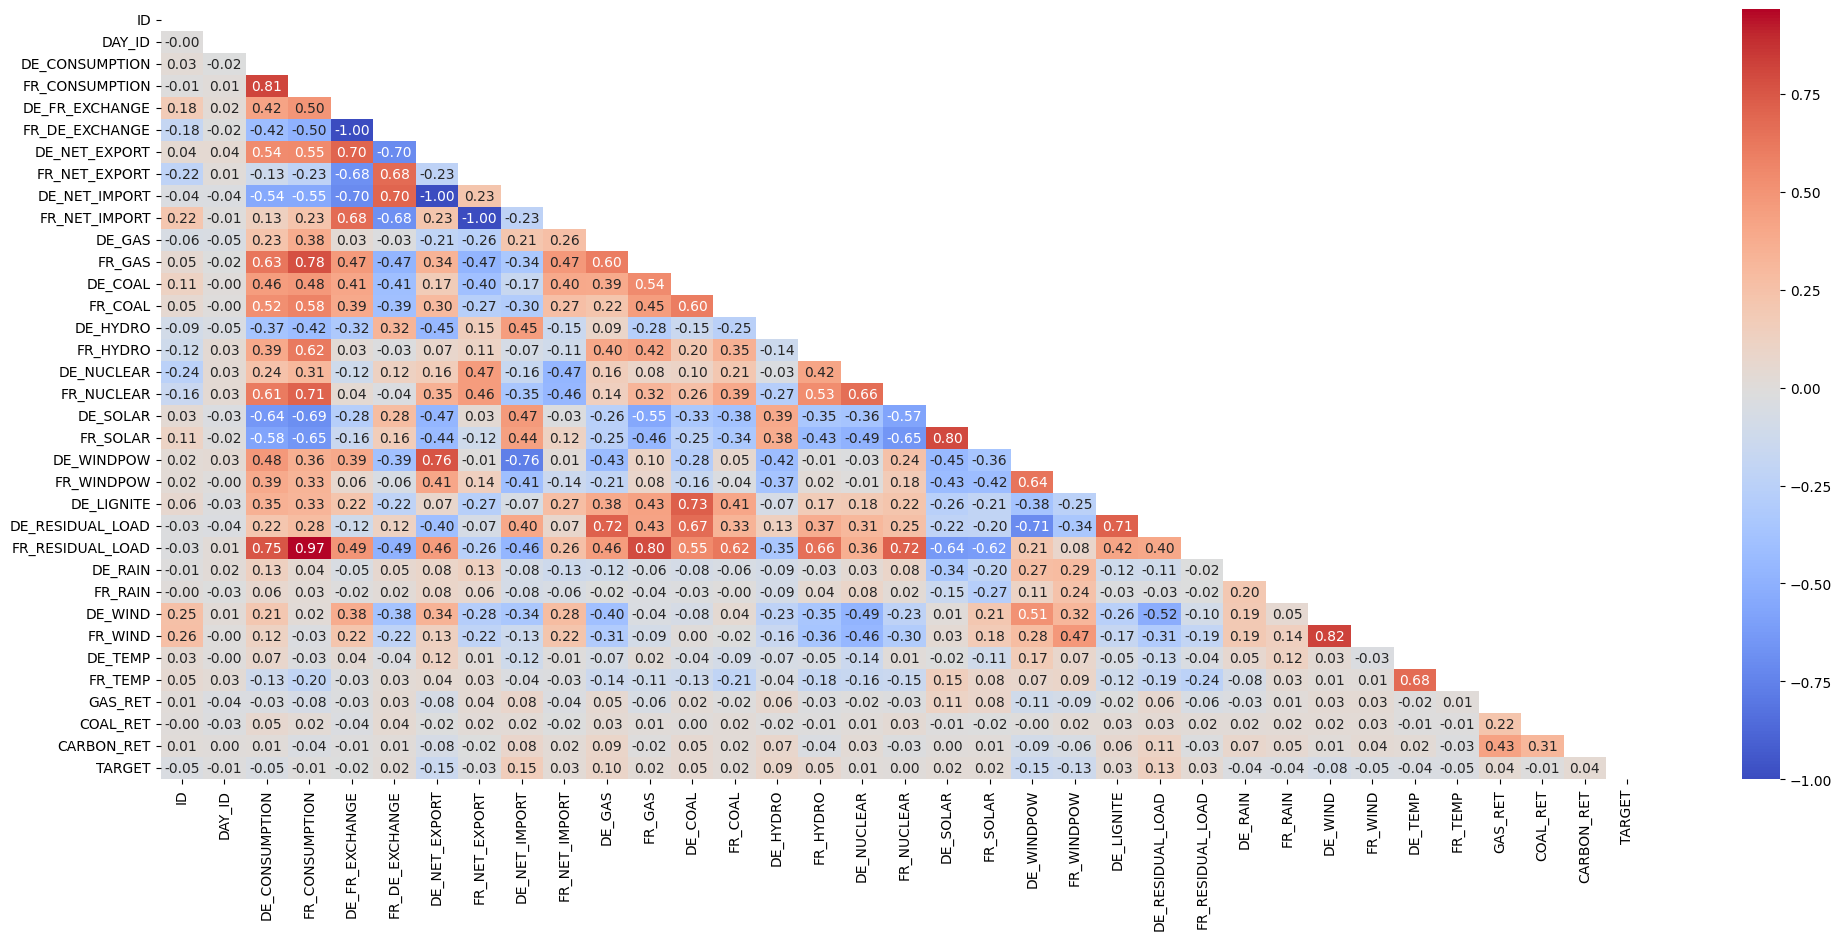

In [ ]:
#Correlation matrix

corr_matrix = merged_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(24, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

From this matrix, we can identify that some features are negatively correlated (FR_DE_EXCHANGE & DE_FR_EXCHANGE, DE_NET_IMPORT & DE_NET_EXPORT, FR_NET_IMPORT & FR_NET_EXPORT), extremely correlated (FR_RESIDUAL_LOAN & FR_CONSUMPTION), and highly correlated (FR_CONSUMPTION & DE_CONSUMPTION, FR_RESIDUAL_LOAN & FR_GAS, FR_SOLAR & DE_SOLAR, FR_WIND & DE_WIND). We will decide in the preprocessing step what to do with these features.




Now that we have explored and visualize our data, we can define our two objectives in this challenge to better answer them:

* How to predict the variation of electricity price?
* Which features predict the best the price of electricity?
